In [1]:
#import the nccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

#from sklearn.datasets import * 
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn import datasets, metrics
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn import svm
from sklearn.metrics import confusion_matrix, roc_curve,  accuracy_score, roc_auc_score

from sklearn.model_selection import cross_val_predict, train_test_split

import seaborn as sns

### 1.) Linear SVC in case of linear separation

- load the Iris dataset (can be found in sklearn API)
- scale the data and plot the petal length vs petal width in a scatterplot colored with the target
- train an SVC model with linear kernel with default parameter settings, but once with C=1 and then C=1000
- visualize the model's decision boundary and the margins based on the coefficients learnt by the model
- interpret the results, what is the role of the C hyperparameter?

In [2]:
#loading the dataset

iris = datasets.load_iris()
X = iris.data[:, 2:4]
y = iris.target

In [3]:
#dataframe

data = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns= iris['feature_names'] + ['target'])

y_dataframe = data.pop('target')

# Scale the data to have 0 mean and 1 variance feature-wise
data = (data - data.mean()) / data.std()

In [4]:
#scaling the dataset

x_scaled = []

for i in range(0,len(X[0])):
    mean = np.mean(X.T[i])
    std = np.std(X.T[i])
    new_data = (X.T[i]-mean)/std
    x_scaled.append(new_data)
    
#transposing back the dataset

x_new_scaled = np.array(x_scaled).T

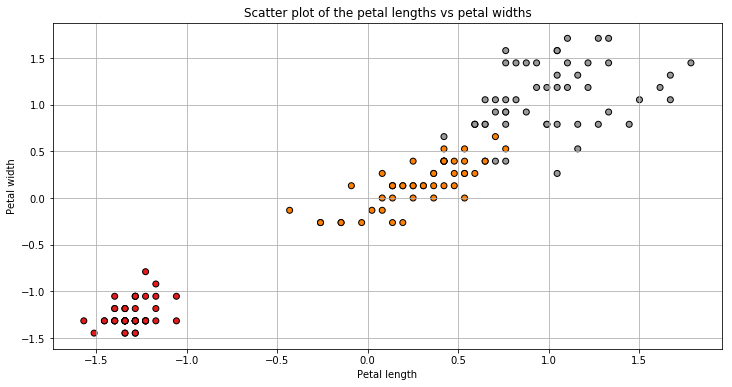

In [5]:
plt.figure(figsize=(12,6))

plt.scatter(x_new_scaled[:, 0], x_new_scaled[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.title('Scatter plot of the petal lengths vs petal widths')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.grid()
plt.show()

In [6]:
#function for creating the SVC model the results:
#takes the x, the y and c as a parameter
#returns the weight slope

def SVC_model(data_x, data_y, c):

    #creating model with c = 1

    clf = SVC(kernel='linear', C = c)
    #clf = SVC(kernel='linear', C = c)
    clf.fit(data_x, data_y)

    #calculating the coefficients

    w = clf.coef_[0]

    a = -w[0] / w[1]
    
    #creating the slope

    xx = np.linspace(-2,2)
    yy = a * xx - clf.intercept_[0] / w[1]
    
    result = [xx, yy, w]
    
    return(result)

In [7]:
#function for the plot
#takes the weight slope as an argument
#returns the plot

def plot_function(data_x1, data_x2, data_y, xx, yy):

    plt.figure(figsize=(12,6))

    h0 = plt.plot(xx, yy, 'k-', label="non weighted div")
    plt.scatter(data_x1, data_x2, c = data_y, cmap=plt.cm.Set1, edgecolor='k')
    
    plt.title('Scatter plot of the petal lengths vs petal widths')
    plt.xlabel('Petal length')
    plt.ylabel('Petal width')
    
    plt.xlim(-2,2)
    plt.ylim(-2,2)

    plt.grid()
    plt.show()

    return()


The weights:

[-1.35349272 -1.16861263]


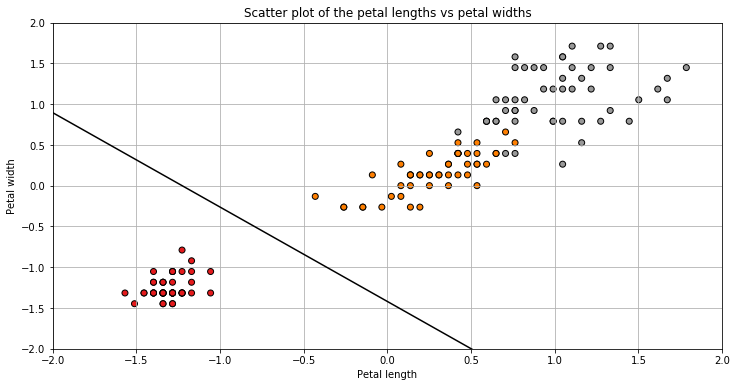

()

In [8]:
#calling the model with c = 1

weights_c1 = SVC_model(x_new_scaled, y, 1)

print()
print('The weights:')
print()
print(weights_c1[2])

plot_function(x_new_scaled[:, 0], x_new_scaled[:, 1], y, weights_c1[0], weights_c1[1])


The weights:

[-1.49242209 -1.23441536]


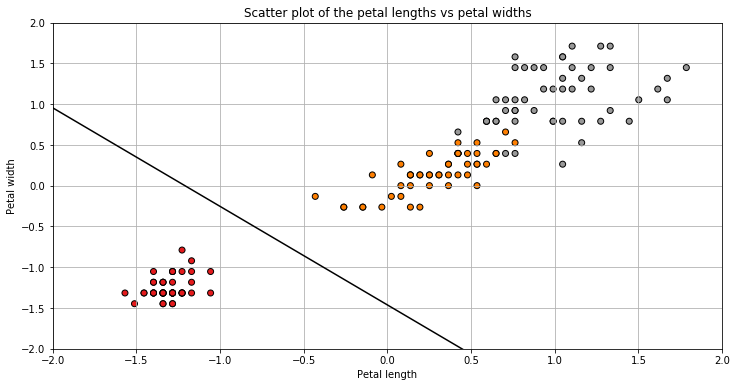

()

In [9]:
#calling the model with c = 1000

weights_c1000 = SVC_model(x_new_scaled, y, 1000)

print()
print('The weights:')
print()
print(weights_c1000[2])

plot_function(x_new_scaled[:, 0], x_new_scaled[:, 1], y, weights_c1000[0], weights_c1000[1])

C is the regularization parameter. The strength of the regularization is inversely proportional to C. The penalty is a squared l2 penalty. The exercise was to set c to two values: 1 and 1000. When calculating the coefficients for creating the slope, I did not see a significant difference between the two slopes. This might be, because the two types of irises are very well separated. Let's try another method, in which I remove one of the irises and recreate the same plots:

In [10]:
#separating the dataset according to the three irises

first_x = []
first_y = []
second_x = []
second_y = []
third_x = []
third_y = []

for i in range(0,len(x_new_scaled)):
    if y[i] == 0:
        first_x.append(x_new_scaled[i])
        first_y.append(y[i])
    elif y[i] == 1:
        second_x.append(x_new_scaled[i])
        second_y.append(y[i])
    elif y[i] == 2:
        third_x.append(x_new_scaled[i])
        third_y.append(y[i])
        
first_x = [l.tolist() for l in first_x]
second_x = [l.tolist() for l in second_x]
third_x = [l.tolist() for l in third_x]
        
#the possible options:

dataset_x_list = list(list(first_x) + list(second_x)), list(list(first_x) + list(third_x)), list(list(second_x) + list(third_x))
dataset_y_list = [first_y + second_y, first_y + third_y, second_y + third_y]


The weights:

[1.35349272 1.16861263]


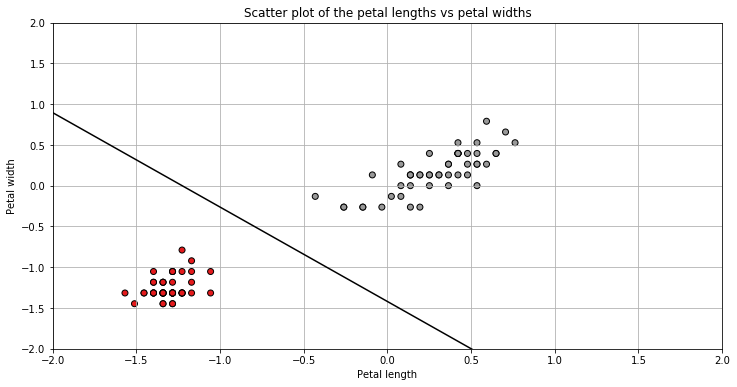


The weights:

[0.68487142 0.60163267]


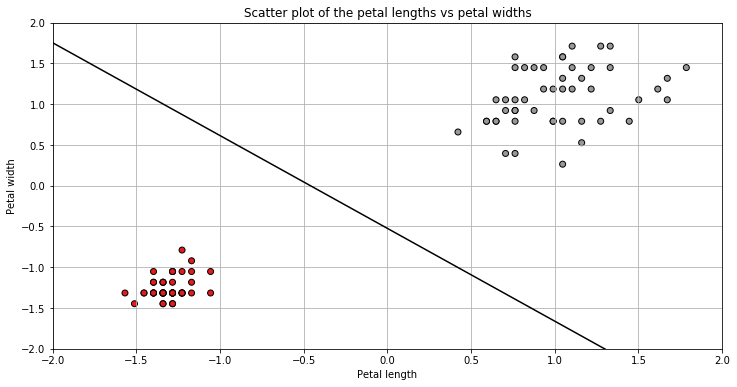


The weights:

[2.09352075 2.44252199]


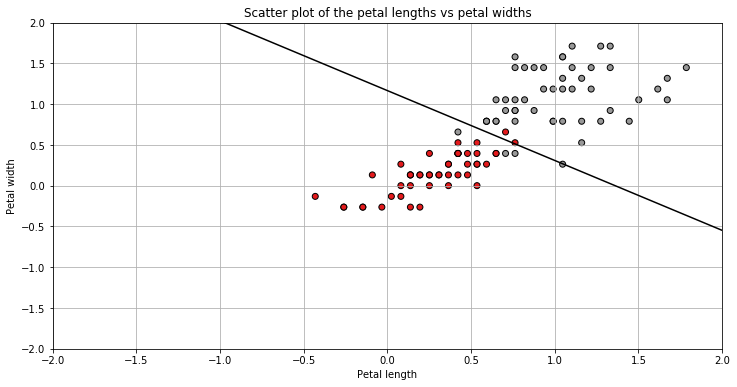

In [11]:
#c = 1 for the different ireses

for i in range(0,len(dataset_x_list)):
    
    data_x = dataset_x_list[i]
    data_y = dataset_y_list[i]

    weights_c1 = SVC_model(data_x, data_y, 1)

    print()
    print('The weights:')
    print()
    print(weights_c1[2])

    plot_function(np.array(data_x).T[0], np.array(data_x).T[1], data_y, weights_c1[0], weights_c1[1])


The weights:

[1.49242209 1.23441536]


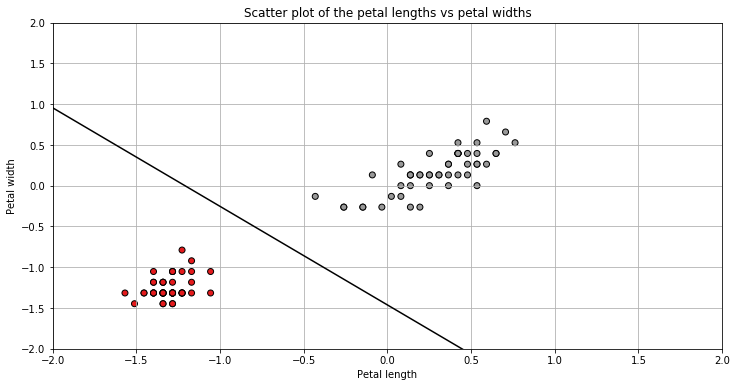


The weights:

[0.68487142 0.60163267]


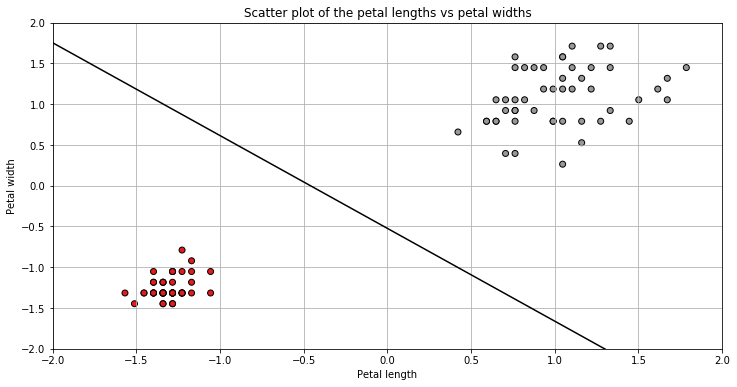


The weights:

[7.03681346 6.07627313]


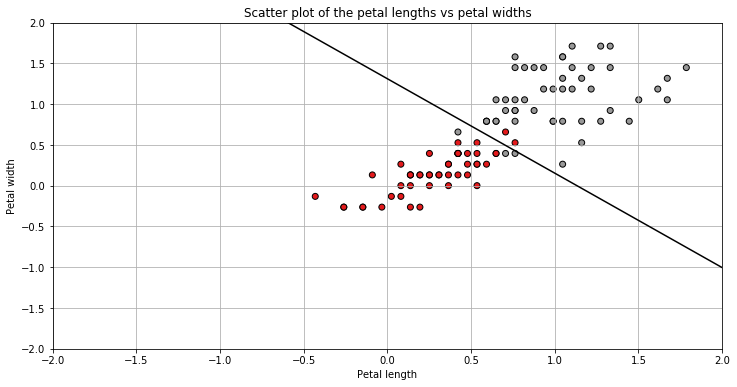

In [12]:
#c = 1000 for differet irises

for i in range(0,len(dataset_x_list)):
    
    data_x = dataset_x_list[i]
    data_y = dataset_y_list[i]

    weights_c1 = SVC_model(data_x, data_y, 1000)

    print()
    print('The weights:')
    print()
    print(weights_c1[2])

    plot_function(np.array(data_x).T[0], np.array(data_x).T[1], data_y, weights_c1[0], weights_c1[1])

The slopes are different in this case. As it's seen, when we only consider the second and third data, the slope goes through one data (at the c=1 case) and two dots are on the other side of the line. Even though the decision boundry was violated, the hyperline is acceptable in all cases. All the boundraries shown in one graph:

In [13]:
#c = 1 for the different ireses

data_x = dataset_x_list[2]
data_y = dataset_y_list[2]

data_x2 = dataset_x_list[0]
data_y2 = dataset_y_list[0]

weights_c1 = SVC_model(data_x, data_y, 1)
weights_c2 = SVC_model(data_x2, data_y2, 1)

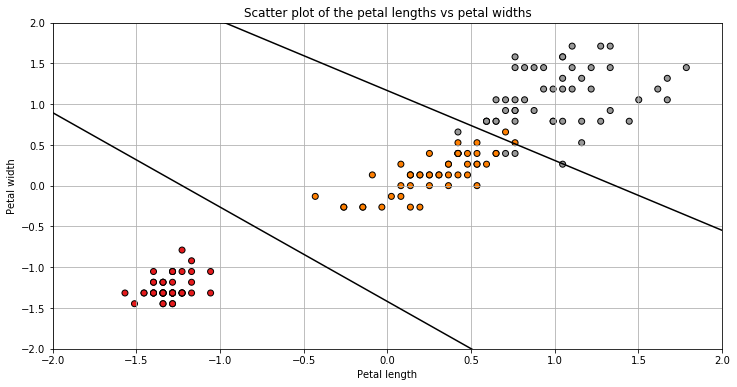

In [14]:
plt.figure(figsize=(12,6))

h0 = plt.plot(weights_c1[0], weights_c1[1], 'k-', label="non weighted div")
h1 = plt.plot(weights_c2[0], weights_c2[1], 'k-', label="non weighted div")

plt.scatter(x_new_scaled[:, 0], x_new_scaled[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.title('Scatter plot of the petal lengths vs petal widths')
plt.xlabel('Petal length')
plt.ylabel('Petal width')

plt.xlim(-2,2)
plt.ylim(-2,2)

plt.grid()
plt.show()

### Another approach - the margins

As it's seen, the margins are not seen in these graphs. So I figures out naother approach to do this, all at once, not separately.

In [15]:
#collecting the data from the dataframe 
#because these variables were already assigned to separate thigns

X = data.values[:, 2:4]

new_y = []

for i in range(0,len(y_dataframe)):
    new_y.append(int(y_dataframe[i]))

In [16]:
#creating the model with c = 1

svc1 = SVC(C = 1.0, kernel = 'linear', random_state = 42)#, probability = True)
svc1.fit(X, new_y)
svc1.coef_

array([[-1.35803044, -1.17252313],
       [-0.68716581, -0.6036482 ],
       [-2.09812374, -2.45226587]])

In [17]:
#creating the model with c = 1000

svc2 = SVC(C = 1000, kernel = 'linear', random_state = 42)#, probability = True)
svc2.fit(X, new_y)
svc2.coef_

array([[-1.49742178, -1.23855071],
       [-0.68716581, -0.6036482 ],
       [-7.06029162, -6.09652939]])

In [18]:
#creating the meshgrid

petal_length, petal_width = X[:, 0], X[:, 1]

x_min = np.min(petal_length) - 1
x_max = np.max(petal_length) + 1
y_min = np.min(petal_width) - 1
y_max = np.max(petal_width) + 1

petal_length_grid, petal_width_grid = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

In [24]:
#calculating the coefficients and the margins for C = 1

w = svc1.coef_[0]
w2 = svc1.coef_[2]
a = -w[0] / w[1]
a2 = -w2[0] / w2[1]


xx = np.linspace(np.min(petal_length), np.max(petal_length))

yy = a * xx - (svc1.intercept_[0]) / w[1]
yy2 = a2 * xx - (svc1.intercept_[2]) / w2[1]


margin1 = 1 / np.sqrt(np.sum(svc1.coef_ ** 2))
yy_down1 = yy - np.sqrt(1 + a ** 2) * margin1
yy_up1 = yy + np.sqrt(1 + a ** 2) * margin1

margin2 = 1 / np.sqrt(np.sum(svc1.coef_ ** 2))
yy_down2 = yy2 - np.sqrt(1 + a2 ** 2) * margin2
yy_up2 = yy2 + np.sqrt(1 + a2 ** 2) * margin2

In [26]:
#calculating the coefficients and the margins for C = 1

w3 = svc2.coef_[0]
w4 = svc2.coef_[2]
a3 = -w3[0] / w3[1]
a4 = -w4[0] / w4[1]


yy3 = a3 * xx - (svc2.intercept_[0]) / w3[1]
yy4 = a4 * xx - (svc2.intercept_[2]) / w4[1]


margin3 = 1 / np.sqrt(np.sum(svc2.coef_ ** 2))
yy_down3 = yy3 - np.sqrt(1 + a3 ** 2) * margin3
yy_up3 = yy3 + np.sqrt(1 + a3 ** 2) * margin3

margin4 = 1 / np.sqrt(np.sum(svc2.coef_ ** 2))
yy_down4 = yy4 - np.sqrt(1 + a4 ** 2) * margin4
yy_up4 = yy4 + np.sqrt(1 + a4 ** 2) * margin4

### C = 1

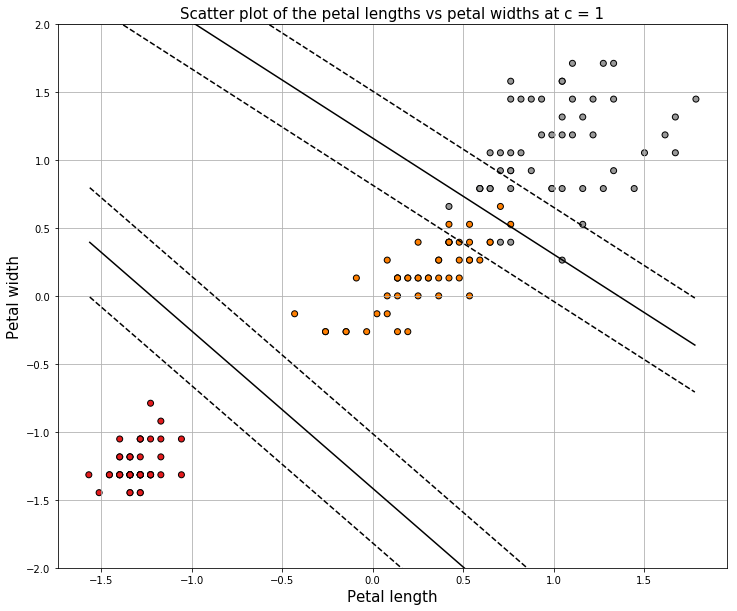

In [28]:
plt.figure(figsize=(12,10))

plt.scatter(x_new_scaled[:, 0], x_new_scaled[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down1, 'k--')
plt.plot(xx, yy_up1, 'k--')

plt.plot(xx, yy2, 'k-')
plt.plot(xx, yy_down2, 'k--')
plt.plot(xx, yy_up2, 'k--')

plt.title('Scatter plot of the petal lengths vs petal widths at c = 1', fontsize = 15)
plt.xlabel('Petal length', fontsize = 15)
plt.ylabel('Petal width', fontsize = 15)

plt.ylim(-2,2)

plt.grid()
plt.show()

### C = 1000

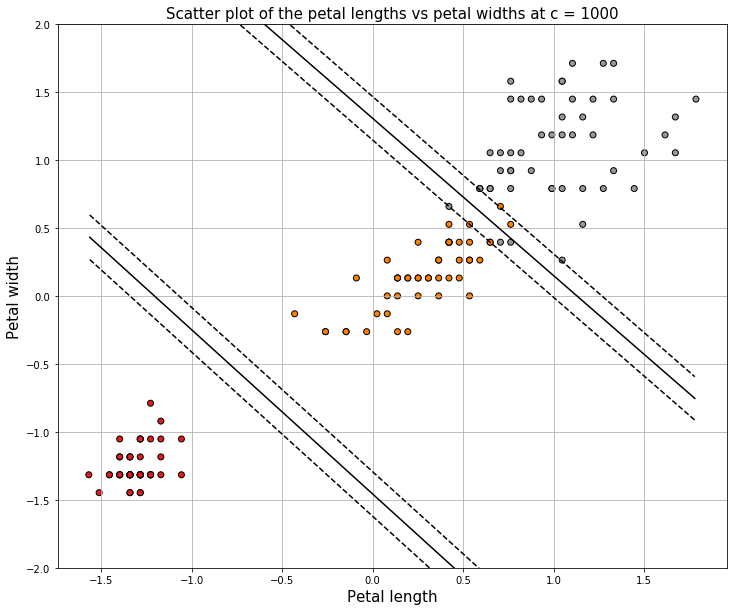

In [29]:
plt.figure(figsize=(12,10))

plt.scatter(x_new_scaled[:, 0], x_new_scaled[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.plot(xx, yy3, 'k-')
plt.plot(xx, yy_down3, 'k--')
plt.plot(xx, yy_up3, 'k--')

plt.plot(xx, yy4, 'k-')
plt.plot(xx, yy_down4, 'k--')
plt.plot(xx, yy_up4, 'k--')

plt.title('Scatter plot of the petal lengths vs petal widths at c = 1000', fontsize = 15)
plt.xlabel('Petal length', fontsize = 15)
plt.ylabel('Petal width', fontsize = 15)

plt.ylim(-2,2)

plt.grid()
plt.savefig('c1000.jpg')
plt.show()

When calculating with higher C, we consider only points closer to the margin than when calculating with a small value of C. This can be seen in the graph, since the borders are much closer to the decision boundrary. 

### 2.) Linear SVC but non-linear separation

- create a dataset with the following: X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
- perform the same steps just as in the previous exercise and use the linear kernel for  the SVC
- since linear SVC cannot do non-linear separation, you will need to do some workaround, for example adding polynomial features (3rd order would be a good choice)
- write down with your own words in few sentences how the support vector machine works 

In [56]:
X, y = sklearn.datasets.make_moons(noise=0.1, random_state=0)
x1, x2 = X[:, 0], X[:, 1]

x1 = (x1 - np.mean(x1))/np.std(x1)
x2 = (x2 - np.mean(x2))/np.std(x2)

svc1 = SVC(C = 1.0, kernel = 'linear', random_state = 42, probability = True)
svc1.fit(X, y)
svc1.coef_

svc2 = SVC(C = 1000, kernel = 'linear', random_state = 42, probability = True)
svc2.fit(X, y)
svc2.coef_

array([[ 0.82689212, -3.80573595]])

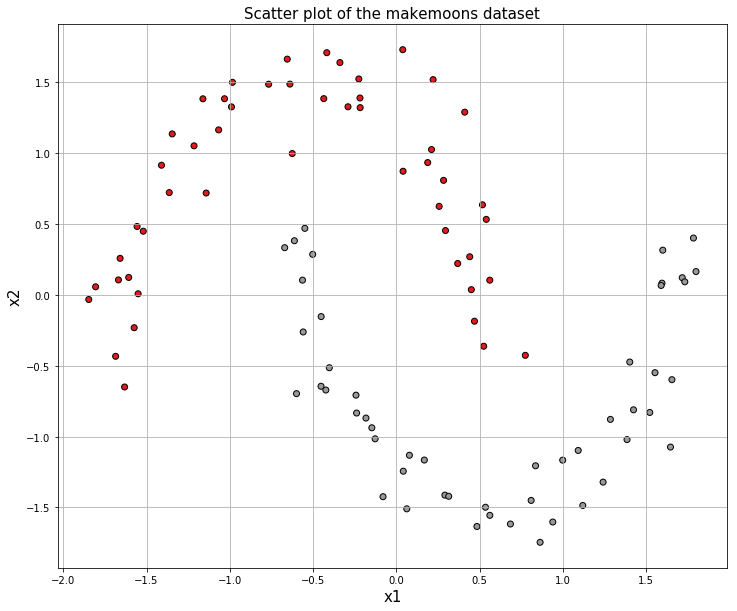

In [57]:
#let's plot the data

plt.figure(figsize=(12,10))

plt.scatter(x1, x2, c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.title('Scatter plot of the makemoons dataset', fontsize = 15)
plt.xlabel('x1', fontsize = 15)
plt.ylabel('x2', fontsize = 15)

#plt.ylim(-1,1.5)
#plt.xlim(-1.5,2.5)

plt.grid()
plt.show()

In [58]:
#creting the meshgrid and calculating the coefficients

x_min = np.min(x1) - 1
x_max = np.max(x1) + 1
y_min = np.min(x2) - 1
y_max = np.max(x2) + 1

x1_grid, x2_grid = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

w = svc1.coef_[0]
w2 = svc2.coef_[0]
a = -w[0] / w[1]
a2 = -w2[0] / w2[1]

xx = np.linspace(np.min(x1-1), np.max(x2+1))

yy = a * xx - (svc1.intercept_[0]) / w[1]
yy2 = a2 * xx - (svc2.intercept_[0]) / w2[1]

margin = 1 / np.sqrt(np.sum(svc1.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

margin2 = 1 / np.sqrt(np.sum(svc2.coef_ ** 2))
yy_down2 = yy2 - np.sqrt(1 + a2 ** 2) * margin2
yy_up2 = yy2 + np.sqrt(1 + a2 ** 2) * margin2

### C = 1

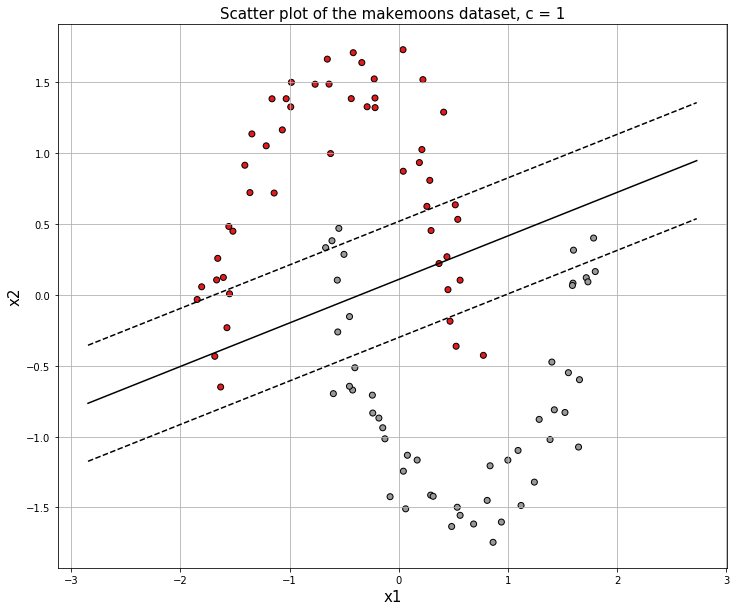

In [59]:
plt.figure(figsize=(12,10))

plt.scatter(x1, x2, c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.title('Scatter plot of the makemoons dataset, c = 1', fontsize = 15)
plt.xlabel('x1', fontsize = 15)
plt.ylabel('x2', fontsize = 15)

#plt.ylim(-1,1.5)
#plt.xlim(-1.5,2.5)

plt.grid()
plt.show()

### C = 1000

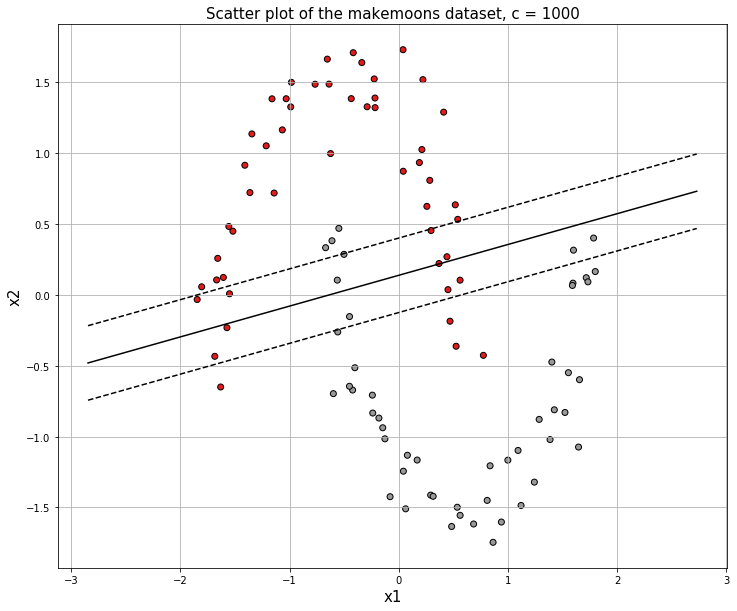

In [60]:
plt.figure(figsize=(12,10))

plt.scatter(x1, x2, c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.plot(xx, yy2, 'k-')
plt.plot(xx, yy_down2, 'k--')
plt.plot(xx, yy_up2, 'k--')

plt.title('Scatter plot of the makemoons dataset, c = 1000', fontsize = 15)
plt.xlabel('x1', fontsize = 15)
plt.ylabel('x2', fontsize = 15)

#lt.ylim(-1,1.5)
#lt.xlim(-1.5,2.5)

plt.grid()
plt.show()

As it's seen, this is not a good fit on the non-linear dataset. We shall try something a bit more complicated. Let's stransforme the x1 and x2 values to their 3rd power!

In [61]:
#transforming the data and plotting the result

x1_pw= x1**3
x2_pw = x2**3

x1_new = (x1_pw - np.mean(x1_pw)) / np.std(x1_pw)
x2_new = (x2_pw - np.mean(x2_pw)) / np.std(x2_pw)

X_new = np.array([x1_new, x2_new]).T

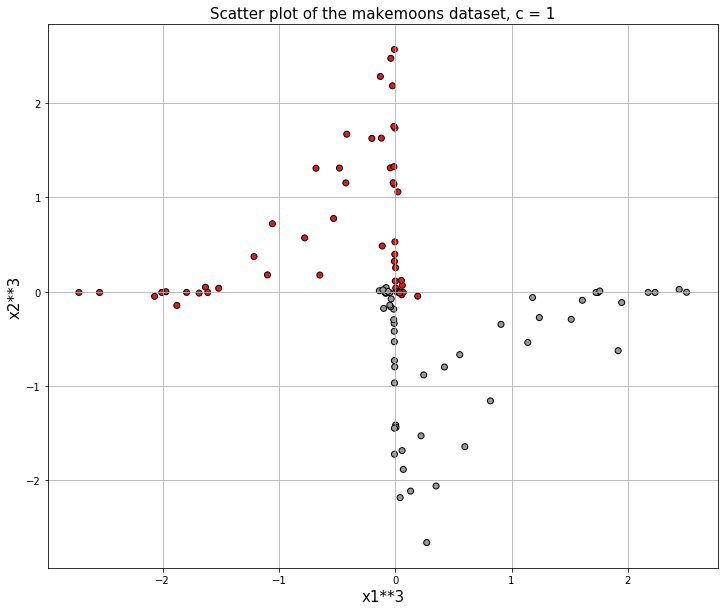

In [62]:
plt.figure(figsize=(12,10))

plt.scatter(x1_new, x2_new, c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.title('Scatter plot of the makemoons dataset, c = 1', fontsize = 15)
plt.xlabel('x1**3', fontsize = 15)
plt.ylabel('x2**3', fontsize = 15)

plt.grid()
plt.show()

In [63]:
svc1 = SVC(C = 1.0, kernel = 'linear', random_state = 42, probability = True)
svc1.fit(X_new, y)
svc1.coef_

svc2 = SVC(C = 1000, kernel = 'linear', random_state = 42, probability = True)
svc2.fit(X_new, y)
svc2.coef_

array([[  1.10864969, -10.11316564]])

In [64]:
#creting the meshgrid and calculating the coefficients

x_min = np.min(x1_new) - 1
x_max = np.max(x1_new) + 1
y_min = np.min(x2_new) - 1
y_max = np.max(x2_new) + 1

x1_grid, x2_grid = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))

w = svc1.coef_[0]
w2 = svc2.coef_[0]
a = -w[0] / w[1]
a2 = -w2[0] / w2[1]

xx = np.linspace(np.min(x1_new-1), np.max(x2_new+1))

yy = a * xx - (svc1.intercept_[0]) / w[1]
yy2 = a2 * xx - (svc2.intercept_[0]) / w2[1]

margin = 1 / np.sqrt(np.sum(svc1.coef_ ** 2))
yy_down = yy - np.sqrt(1 + a ** 2) * margin
yy_up = yy + np.sqrt(1 + a ** 2) * margin

margin2 = 1 / np.sqrt(np.sum(svc2.coef_ ** 2))
yy_down2 = yy2 - np.sqrt(1 + a2 ** 2) * margin2
yy_up2 = yy2 + np.sqrt(1 + a2 ** 2) * margin2

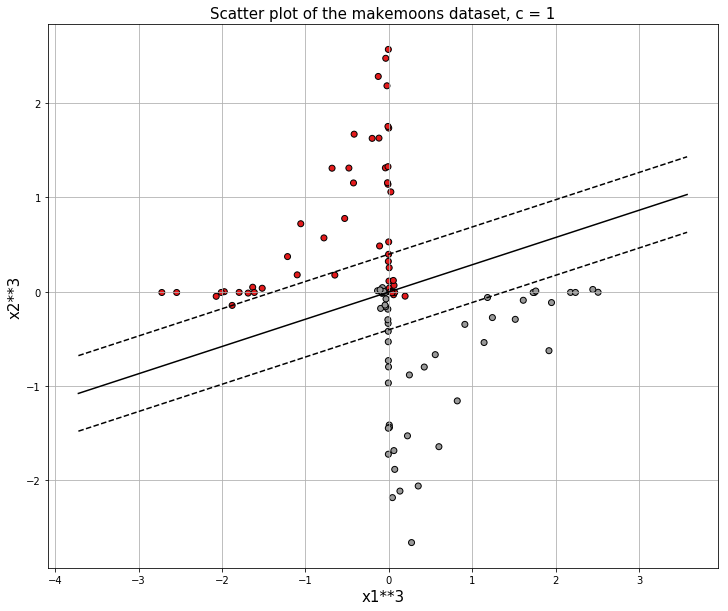

In [65]:
plt.figure(figsize=(12,10))

plt.scatter(x1_new, x2_new, c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.plot(xx, yy, 'k-')
plt.plot(xx, yy_down, 'k--')
plt.plot(xx, yy_up, 'k--')

plt.title('Scatter plot of the makemoons dataset, c = 1', fontsize = 15)
plt.xlabel('x1**3', fontsize = 15)
plt.ylabel('x2**3', fontsize = 15)

#plt.ylim(-1,1.5)
#plt.xlim(-1.5,2.5)

plt.grid()
plt.show()

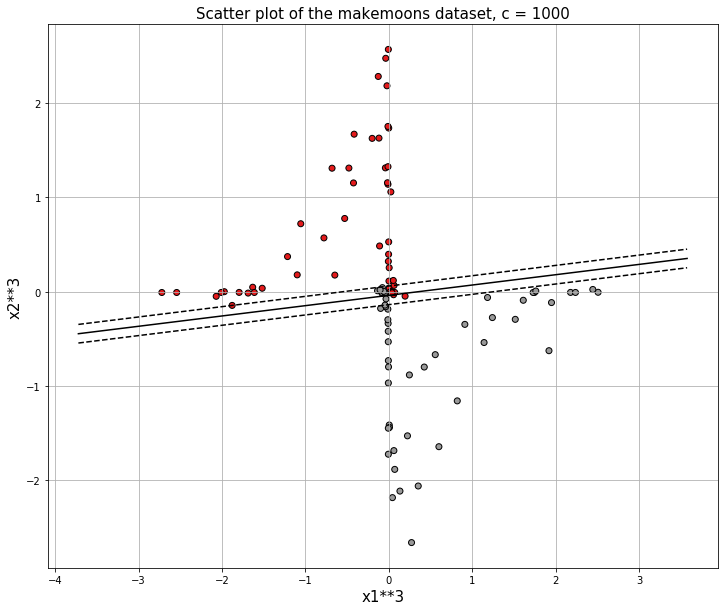

In [66]:
plt.figure(figsize=(12,10))

plt.scatter(x1_new, x2_new, c=y, cmap=plt.cm.Set1, edgecolor='k')

plt.plot(xx, yy2, 'k-')
plt.plot(xx, yy_down2, 'k--')
plt.plot(xx, yy_up2, 'k--')

plt.title('Scatter plot of the makemoons dataset, c = 1000', fontsize = 15)
plt.xlabel('x1**3', fontsize = 15)
plt.ylabel('x2**3', fontsize = 15)

#lt.ylim(-1,1.5)
#lt.xlim(-1.5,2.5)

plt.grid()
plt.show()

SVN - Support Vector Machine is a Machine learning algorithm, which involves predicintg and classifying data. It's for both linear and non-linear regression problems. As it's seen in the previous graphs, the algorithm created a hyperplane which separated the data into classes. By many problems, we have an infinite amount of lines that are perfectly separate the data. The SVM algorithm finds the points closest to the line from both of the classes. These are the support vectors. The distance between the line and the support vectors is the margin. Our goal is to maximize the margin's value. The optimal hyperplane has the maximized margin. 

### 3.) Load the dataset from 2 weeks ago and build/evaluate the SVC with default settings

Reminder:
- you need to build a classifier that predicts the probability of a sample coming from a cancerous (tumor type is normal or not) person based on the measured protein levels
- train the SVM classifier (SVC in sklearn API) on every second sample (not first 50% of the data (!), use every second line)
- generate prediction for the samples that were not used during the training

To-do now:
- build default SVC, but set it to predict probabilities
- plot the ROC curve and calculate the confusion matrix for the predictions
- do the same for the CancerSEEK predictions and compare your model's performance to CancerSEEK performance (as a reference, plot it on the same figure)
- how good is the performance of the new model?

In [67]:
#reading in the data

proteins = pd.read_csv('proteins.csv')
protein_levels = proteins.drop(columns = ['Patient ID #', 'Sample ID #', 'AJCC Stage', 'CancerSEEK Logistic Regression Score', 'CancerSEEK Test Result'])
protein_levels.head()

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,Colorectum,1583.45,5598.50,3621.04,5.09,19.08,*16.452,9.81,540.1,*1938.654,...,11606.6,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82
1,Colorectum,*715.308,20936.35,2772.96,7.27,10.04,40.91,27.57,"5,902.4",*1938.654,...,14374.99,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09
2,Colorectum,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,973.8,1976.94,...,38375,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.60
3,Colorectum,*715.308,1604.34,2029.96,5.39,8.31,*16.452,7.78,"2,027.5",*1938.654,...,12072.51,1059.24,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73
4,Colorectum,801.3,2087.57,2069.17,*4.854,11.73,*16.452,12.21,614.5,*1938.654,...,23718.17,1736.92,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.20


In [68]:
#removing some columns

list_of_indices_to_remove = []

for i in range(0,len(protein_levels)):
    number_of_nans = protein_levels.iloc[i].isna().sum()
    if number_of_nans > 0:
        list_of_indices_to_remove.append(i)
        
protein_levels_dropped = protein_levels.drop(protein_levels.index[list_of_indices_to_remove])

protein_levels_dropped.head()

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,Colorectum,1583.45,5598.50,3621.04,5.09,19.08,*16.452,9.81,540.1,*1938.654,...,11606.6,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82
1,Colorectum,*715.308,20936.35,2772.96,7.27,10.04,40.91,27.57,"5,902.4",*1938.654,...,14374.99,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09
2,Colorectum,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,973.8,1976.94,...,38375,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.60
3,Colorectum,*715.308,1604.34,2029.96,5.39,8.31,*16.452,7.78,"2,027.5",*1938.654,...,12072.51,1059.24,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73
4,Colorectum,801.3,2087.57,2069.17,*4.854,11.73,*16.452,12.21,614.5,*1938.654,...,23718.17,1736.92,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.20


In [69]:
#checking the individual tumor types

tumor_type = list(protein_levels_dropped['Tumor type'])

individual_tumor_types = []

for i in range(0,len(tumor_type)):
    if tumor_type[i] not in individual_tumor_types:
        individual_tumor_types.append(tumor_type[i])
        
individual_tumor_types

['Colorectum',
 'Lung',
 'Breast',
 'Pancreas',
 'Ovary',
 'Esophagus',
 'Liver',
 'Stomach',
 'Normal']

In [70]:
for i in range(0,len(individual_tumor_types)):
    protein_levels_dropped['Tumor type'] = protein_levels_dropped['Tumor type'].replace(individual_tumor_types[i], i+1)
    
protein_levels_dropped.head()

,Tumor type,AFP (pg/ml),Angiopoietin-2 (pg/ml),AXL (pg/ml),CA-125 (U/ml),CA 15-3 (U/ml),CA19-9 (U/ml),CD44 (ng/ml),CEA (pg/ml),CYFRA 21-1 (pg/ml),...,Prolactin (pg/ml),sEGFR (pg/ml),sFas (pg/ml),SHBG (nM),sHER2/sEGFR2/sErbB2 (pg/ml),sPECAM-1 (pg/ml),TGFa (pg/ml),Thrombospondin-2 (pg/ml),TIMP-1 (pg/ml),TIMP-2 (pg/ml)
0,1,1583.45,5598.50,3621.04,5.09,19.08,*16.452,9.81,540.1,*1938.654,...,11606.6,3284.17,*204.792,55.06,6832.07,9368.53,*16.086,21863.74,56428.71,39498.82
1,1,*715.308,20936.35,2772.96,7.27,10.04,40.91,27.57,"5,902.4",*1938.654,...,14374.99,1911.81,*204.792,72.92,5549.47,6224.55,*16.086,29669.66,73940.49,41277.09
2,1,4365.53,2350.93,4120.77,*4.854,16.96,*16.452,14.59,973.8,1976.94,...,38375,1743.94,*204.792,173.78,3698.16,4046.48,179.03,6020.47,22797.28,28440.60
3,1,*715.308,1604.34,2029.96,5.39,8.31,*16.452,7.78,"2,027.5",*1938.654,...,12072.51,1059.24,*204.792,29.47,5856,6121.93,*16.086,4331.02,20441.19,25896.73
4,1,801.3,2087.57,2069.17,*4.854,11.73,*16.452,12.21,614.5,*1938.654,...,23718.17,1736.92,*204.792,78.07,5447.93,6982.32,*16.086,2311.91,56288.51,49425.20


In [71]:
#splitting the dataset

train_x = protein_levels_dropped.values[::2][:, 1:]
train_y = protein_levels_dropped.values[::2][:,0:1]

test_x = protein_levels_dropped.values[1::2][:, 1:]
test_y = protein_levels_dropped.values[1::2][:,0:1]

train_y_bin = []
test_y_bin = []

#the binary conversion:

for i in range(0,len(train_y)):
    if train_y[i] < 9:
        train_y_bin.append(1)
    else:
        train_y_bin.append(0)
        
for i in range(0,len(test_y)):
    if test_y[i] < 9:
        test_y_bin.append(1)
    else:
        test_y_bin.append(0)

In [72]:
#let's convert the train values from string to float
#we have to remove the commas, * and ** symbols

train_x_float = []

for i in range(0,len(train_x)):
    rows = []
    
    for j in range(0,len(train_x[i])):
        
        if isinstance(train_x[i][j], float) == True:
            num4 = train_x[i][j]
            
        else:
            num1 = train_x[i][j]
            num2 = num1.replace(",", "")
            num3 = num2.replace("**", "")
            num4 = num3.replace("*", "")
            
        rows.append(float(num4))
        
    train_x_float.append(rows)

In [73]:
#let's convert the test values from string to float
#we have to remove the commas, * and ** symbols

test_x_float = []

for i in range(0,len(test_x)):
    rows = []
    
    for j in range(0,len(test_x[i])):
        
        if isinstance(test_x[i][j], float) == True:
            num4 = test_x[i][j]
            
        else:
            num1 = test_x[i][j]
            num2 = num1.replace(",", "")
            num3 = num2.replace("**", "")
            num4 = num3.replace("*", "")
            
        rows.append(float(num4))
        
    test_x_float.append(rows)

In [74]:
#using logistic regression:

clf = LogisticRegression(random_state=0).fit(train_x_float, train_y_bin)
predicted_train = clf.predict(train_x_float)

acc = clf.score(test_x_float, test_y_bin)

print('The mean accuracy on the dataset:', round(acc,4))

C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The mean accuracy on the dataset: 0.8557


I have tried both the following models to create the SVC model for the unscaled data. After hours of trying an waiting for the code to run, I hve started google-ing what happens if I use this model for unscaled datasets. The documentation said that 'it takes longer'. Not only did it take longer, I repeatedly had to restart the kernel, because it forze constantly. In the next exercise, I tried to do the following with the scaled dataset, which required around a second to run. I still wasn't sure about this, so I contacted a classamate, who claimed that this happened to him too. In conclusion I can say, that the unscaled data is completely inconvenient to use for this model, however the scaled data works perfectly.

In [1]:
#using SVC:

model = SVC(kernel='linear', probability=True, C = 1)
model.fit(test_x_float, test_y_bin)

NameError: name 'SVC' is not defined

In [28]:
#linSVM = SVC(kernel='linear', random_state=0, probability=True)
#preds = cross_val_predict(estimator=linSVM, X = test_x_float, y = test_y_bin, cv=5, method='predict_proba')
#fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)
#roc_curve_plot(y_score=preds[:, 1], y_true=values_bin)

### 4.) Scale data and try different kernels

- scale your data before applying the SVC model
- plot the ROC curve and calculate the confusion matrix for the predictions
- do your model perform better or worse after scaling? 
- try out other kernels (linear, poly) and evaluate the performance of the model the same way

In [29]:
#getting the data from the dataframe

dataset = protein_levels_dropped.values[:, 1:]
values = protein_levels_dropped.values[:,0:1]

In [30]:
#replacing the nan values in the dataset

new_dataset = []

for i in range(0,len(dataset)):
    rows = []
    
    for j in range(0,len(dataset[i])):
        
        if isinstance(dataset[i][j], float) == True:
            num4 = dataset[i][j]
            
        else:
            num1 = dataset[i][j]
            num2 = num1.replace(",", "")
            num3 = num2.replace("**", "")
            num4 = num3.replace("*", "")
            
        rows.append(float(num4))
        
    new_dataset.append(rows)

In [31]:
values_bin = []

for i in range(0,len(values)):
    if values[i] < 9:
        values_bin.append(1)
    else:
        values_bin.append(0)

In [32]:
#scaling the dataset

transposed_dataset = np.array(new_dataset).T
scaled_dataset = []

for i in range(0,len(transposed_dataset)):
    temp = (transposed_dataset[i]-np.mean(transposed_dataset[i]))/np.std(transposed_dataset[i])
    scaled_dataset.append(temp)
    
#transposing back the dataset

scaled_dataset = np.array(scaled_dataset).T

In [33]:
#splitting the dataset

scaled_train_x = scaled_dataset[::2]
scaled_train_y = values_bin[::2]

scaled_test_x = scaled_dataset[1::2]
scaled_test_y = values_bin[1::2]

### Using logistic regression

In [34]:
#using logistic regression:

clf = LogisticRegression(random_state=0).fit(scaled_train_x, scaled_train_y)
predicted_train = clf.predict(scaled_train_x)

acc = clf.score(scaled_test_x, scaled_test_y)

print('The mean accuracy on the dataset:', round(acc,4))

The mean accuracy on the dataset: 0.8568


C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


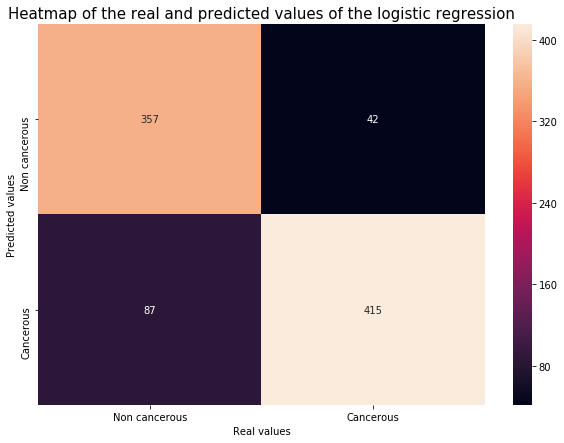

In [35]:
#creating the confusion matrix

predicted_test_clf = clf.predict(scaled_test_x)
confusion_matrix_values = confusion_matrix(scaled_test_y, predicted_test_clf)

plt.subplots(figsize=(10,7))
x_axis_labels = ['Non cancerous','Cancerous']
y_axis_labels = ['Non cancerous','Cancerous']
p1 = sns.heatmap(confusion_matrix_values, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt="d")

plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Heatmap of the real and predicted values of the logistic regression', fontsize=15)
plt.show()

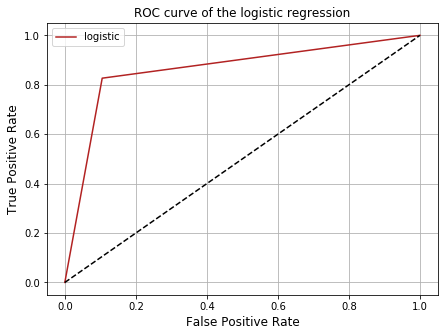

In [36]:
#creating the roc curve

fpr, tpr, thresholds = roc_curve(scaled_test_y, predicted_test_clf)
auc = np.round(metrics.roc_auc_score(scaled_test_y, predicted_test_clf), 3)

#plotting the figure

plt.figure(figsize=(7,5))
plt.plot(fpr,tpr, color = 'firebrick', label = 'logistic')
plt.plot([0, 1], [0, 1], '--', c='k')
plt.title('ROC curve of the logistic regression')
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid()
plt.legend()
plt.show()

As it's seen, the logistic regression is not better after scaling the dataset. What about the SVC model?


### Using SVC model

In [37]:
#using SVC:

model = SVC(kernel='linear', probability=True, C = 1)
model.fit(scaled_test_x, scaled_test_y)
predicted_train_scaled = model.predict(scaled_train_x)

acc = model.score(scaled_test_x, scaled_test_y)

print('The mean accuracy on the dataset:', round(acc,4))

The mean accuracy on the dataset: 0.8668


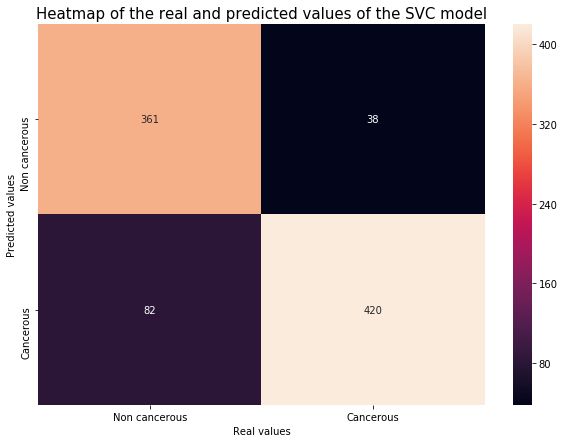

In [38]:
#creating the confusion matrix

predicted_test_model = model.predict(scaled_test_x)
confusion_matrix_values = confusion_matrix(scaled_test_y, predicted_test_model)

plt.subplots(figsize=(10,7))
x_axis_labels = ['Non cancerous','Cancerous']
y_axis_labels = ['Non cancerous','Cancerous']
p1 = sns.heatmap(confusion_matrix_values, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt="d")

plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Heatmap of the real and predicted values of the SVC model', fontsize=15)
plt.show()

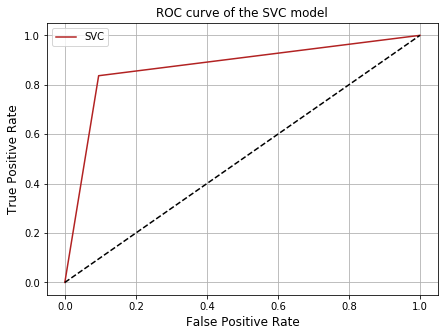

In [39]:
#creating the roc curve

fpr_svc, tpr_svc, thresholds_svc = roc_curve(scaled_test_y, predicted_test_model)
auc_svc = np.round(metrics.roc_auc_score(scaled_test_y, predicted_test_model), 3)

#plotting the figure

plt.figure(figsize=(7,5))
plt.plot(fpr_svc,tpr_svc, color = 'firebrick', label = 'SVC')
plt.plot([0, 1], [0, 1], '--', c='k')
plt.title('ROC curve of the SVC model')
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.legend()
plt.grid()
plt.show()

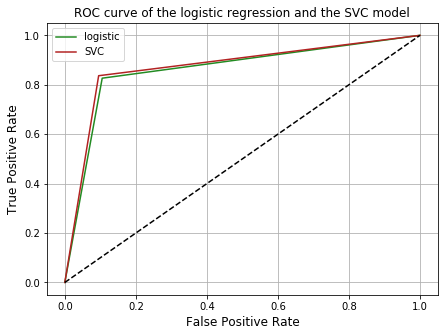

In [40]:
plt.figure(figsize=(7,5))
plt.plot(fpr,tpr, color = 'forestgreen', label = 'logistic')
plt.plot(fpr_svc,tpr_svc, color = 'firebrick', label = 'SVC')
plt.plot([0, 1], [0, 1], '--', c='k')
plt.title('ROC curve of the logistic regression and the SVC model')
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid()
plt.legend()
plt.show()

As it's seen from the ROC curves, the confusion matrices and the accuracies, the SVC model performs better when the data is scaled than the logistic regression. 

AFter reading some material on the topic, I realized that the previous ROC curves only consider three points in the dataset, when they check th sensitivity. Let's create the ROC curve, which checks it at multiple points! 

In [41]:
def roc_curve_plot(y_score, y_true):
    fpr, tpr, _ = roc_curve(y_score=y_score, y_true=y_true)
    
    plt.figure(figsize=(10, 6))
    
    plt.plot(fpr, tpr, color = 'firebrick', label='AUC: ' + str(np.round(roc_auc_score(y_score=y_score, y_true=y_true), 3)))
    plt.plot([0, 1], [0, 1], '--', color = 'black')
    
    plt.legend(fontsize=11)
    plt.title('ROC curve of the SVC model')
    plt.xlabel('False Positive Rate', fontsize = 12)
    plt.ylabel('True Positive Rate', fontsize = 12)
    plt.grid()
    plt.show()

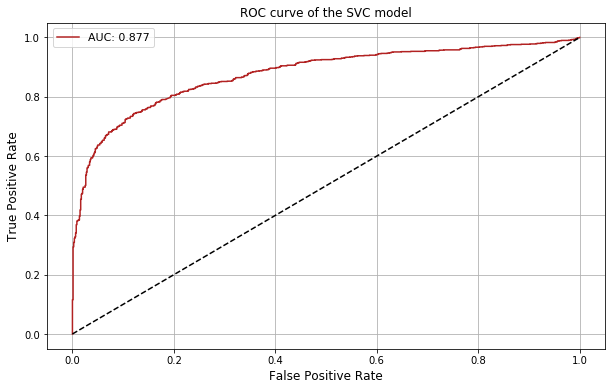

In [42]:
linSVM = SVC(kernel='linear', random_state=0, probability=True)
preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
#fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)
roc_curve_plot(y_score=preds[:, 1], y_true=values_bin)

Now that we got the correct result, let's check it out for different kernels too!

### Results with other kernels

C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarni

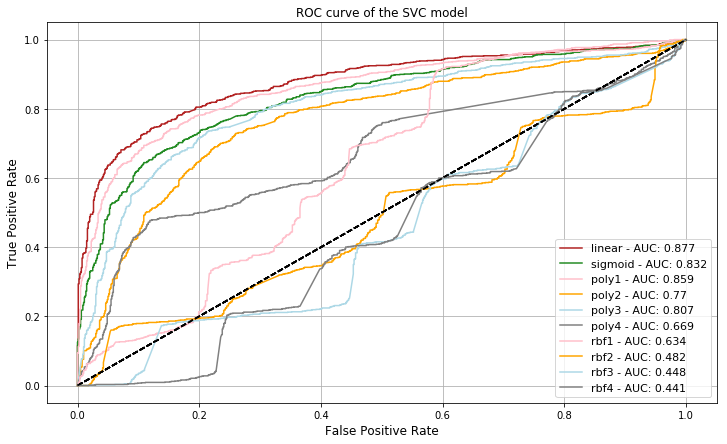

In [43]:
kernels = ['linear', 'sigmoid', 'poly', 'rbf']#,  'precomputed']
colours = ['firebrick', 'forestgreen', 'royalblue', 'gold']
colours2 = ['pink', 'orange', 'lightblue', 'gray']

plt.figure(figsize=(12,7))

for i in range(0, len(kernels)):
    
    #calling the different kernel models
    
    if i == 2:
        for j in range(1,5):
            linSVM = SVC(kernel=kernels[i], degree = j, random_state=0, probability=True)
            preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
            fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)

            plt.plot(fpr, tpr, color = colours2[j-1], label=kernels[i] + str(j) + ' - AUC: ' + str(np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)))
            plt.plot([0, 1], [0, 1], '--', color = 'black')
            
    elif i == 3:
        for j in range(1,5):
            linSVM = SVC(kernel=kernels[i], gamma = j, random_state=0, probability=True)
            preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
            fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)

            plt.plot(fpr, tpr, color = colours2[j-1], label=kernels[i] + str(j) + ' - AUC: ' + str(np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)))
            plt.plot([0, 1], [0, 1], '--', color = 'black')

    else:
        linSVM = SVC(kernel=kernels[i], random_state=0, probability=True)
        preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
        fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)

        plt.plot(fpr, tpr, color = colours[i], label=kernels[i] +' - AUC: ' + str(np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)))
        plt.plot([0, 1], [0, 1], '--', color = 'black')

plt.legend(fontsize=11)
plt.title('ROC curve of the SVC model')
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid()
plt.show()

After the first couple of tries, the linear SVC seems to be the most accurate one. One shall notice that the rbf's AUC score significantly decreased after changing the gamme value from 'scale' to some float numbers. Let's calculate some AUC scores with for loops!

### Kernel: rbf

In [44]:
gamma_list = [0.001, 0.01, 0.1, 1, 10 ]

for j in range(0,len(gamma_list)):
    linSVM = SVC(kernel = 'rbf', gamma = gamma_list[j], random_state=0, probability=True)
    preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)
    auc = np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)
    print('At gamma = ', gamma_list[j], ', the AUC score is: ', auc)

At gamma =  0.001 , the AUC score is:  0.828
At gamma =  0.01 , the AUC score is:  0.862
At gamma =  0.1 , the AUC score is:  0.87
At gamma =  1 , the AUC score is:  0.634
At gamma =  10 , the AUC score is:  0.478


As it's seen, the gamma values around 0.1 seemed to be the most accurate one. Let's continue with the estimation:

In [45]:
gamma_list = np.linspace(0.01, 0.1, 11)

for j in range(0,len(gamma_list)):
    linSVM = SVC(kernel = 'rbf', gamma = gamma_list[j], random_state=0, probability=True)
    preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)
    auc = np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)
    print('At gamma = ', gamma_list[j], ', the AUC score is: ', auc)

At gamma =  0.01 , the AUC score is:  0.862
At gamma =  0.019000000000000003 , the AUC score is:  0.872
At gamma =  0.028000000000000004 , the AUC score is:  0.873
At gamma =  0.037000000000000005 , the AUC score is:  0.874
At gamma =  0.046000000000000006 , the AUC score is:  0.874
At gamma =  0.05500000000000001 , the AUC score is:  0.873
At gamma =  0.064 , the AUC score is:  0.873
At gamma =  0.073 , the AUC score is:  0.872
At gamma =  0.082 , the AUC score is:  0.872
At gamma =  0.09100000000000001 , the AUC score is:  0.871
At gamma =  0.1 , the AUC score is:  0.87


So the best values is at gamma = 0.04. So we hypertuned the parameters for the best rbf kernel! What about the sigmoid kernel?

### Kernel: sigmoid

In [46]:
gamma_list = np.linspace(0.007, 0.012, 5)

for j in range(0,len(gamma_list)):
    linSVM = SVC(kernel = 'sigmoid', gamma = gamma_list[j], random_state=0, probability=True)
    preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)
    auc = np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)
    print('At gamma = ', gamma_list[j], ', the AUC score is: ', auc)

At gamma =  0.007 , the AUC score is:  0.844
At gamma =  0.00825 , the AUC score is:  0.846
At gamma =  0.0095 , the AUC score is:  0.85
At gamma =  0.01075 , the AUC score is:  0.849
At gamma =  0.012 , the AUC score is:  0.849


The best AUC score for the sogmoid kernel is given at gamma = 0.0095, which is 0.85. We can tune some more parameters in this case although:

In [47]:
coeff_list = np.linspace(0.01, 0.05, 5)

for j in range(0,len(coeff_list)):
    linSVM = SVC(kernel = 'sigmoid', gamma = 0.0095, coef0 = coeff_list[j], random_state=0, probability=True)
    preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)
    auc = np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)
    print('At coeff = ',coeff_list[j], ', the AUC score is: ', auc)

At coeff =  0.01 , the AUC score is:  0.848
At coeff =  0.02 , the AUC score is:  0.85
At coeff =  0.03 , the AUC score is:  0.849
At coeff =  0.04 , the AUC score is:  0.847
At coeff =  0.05 , the AUC score is:  0.848


The best score is given at coef0 = 0.02. Now comes the polynomial function! Let's check it out for multiple degrees first!

### Kernel: poly

In [48]:
for j in range(1, 6):
    linSVM = SVC(kernel='poly', degree = j, gamma = 'scale', random_state=0, probability=True)
    preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)
    auc = np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)
    print('At poly kernel with', j, 'degree, the AUC score is:', auc)

At poly kernel with 1 degree, the AUC score is: 0.859
At poly kernel with 2 degree, the AUC score is: 0.771
At poly kernel with 3 degree, the AUC score is: 0.809
At poly kernel with 4 degree, the AUC score is: 0.675
At poly kernel with 5 degree, the AUC score is: 0.636


Besides the first degree polinomial, which is linear, the third one is the best, so let's tune that with the gamma parameters!

In [49]:
gamma_list = np.linspace(0.05, 0.15, 11)

for j in range(0,len(gamma_list)):
    linSVM = SVC(kernel='poly', degree = 3, gamma = gamma_list[j], random_state=0, probability=True)
    preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)
    auc = np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)
    print('At poly kernel with 3 degrees, at gamma = ', gamma_list[j], ' the AUC score is:', auc)    

At poly kernel with 3 degrees, at gamma =  0.05  the AUC score is: 0.824
At poly kernel with 3 degrees, at gamma =  0.06  the AUC score is: 0.829
At poly kernel with 3 degrees, at gamma =  0.07  the AUC score is: 0.832
At poly kernel with 3 degrees, at gamma =  0.08  the AUC score is: 0.832
At poly kernel with 3 degrees, at gamma =  0.09  the AUC score is: 0.833
At poly kernel with 3 degrees, at gamma =  0.09999999999999999  the AUC score is: 0.833
At poly kernel with 3 degrees, at gamma =  0.10999999999999999  the AUC score is: 0.832
At poly kernel with 3 degrees, at gamma =  0.12  the AUC score is: 0.83
At poly kernel with 3 degrees, at gamma =  0.13  the AUC score is: 0.829
At poly kernel with 3 degrees, at gamma =  0.13999999999999999  the AUC score is: 0.827
At poly kernel with 3 degrees, at gamma =  0.15  the AUC score is: 0.825


As it's seen, the ploynomial kernel is the best with gamma = 0.09 with an auc score of 0.833. What about the coeffs?

In [51]:
coeff_list = np.linspace(0.32, 0.37, 10)

for j in range(0,len(coeff_list)):
    linSVM = SVC(kernel='poly', degree = 3, gamma = 0.09, coef0 = coeff_list[j], random_state=0, probability=True)
    preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)
    auc = np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)
    print('At poly kernel with 3 degrees, at gamma = 0.09, at coef = ', coeff_list[j], ' the AUC score is:', auc)    

At poly kernel with 3 degrees, at gamma = 0.09, at coef =  0.32  the AUC score is: 0.859
At poly kernel with 3 degrees, at gamma = 0.09, at coef =  0.32555555555555554  the AUC score is: 0.86
At poly kernel with 3 degrees, at gamma = 0.09, at coef =  0.33111111111111113  the AUC score is: 0.86
At poly kernel with 3 degrees, at gamma = 0.09, at coef =  0.33666666666666667  the AUC score is: 0.86
At poly kernel with 3 degrees, at gamma = 0.09, at coef =  0.3422222222222222  the AUC score is: 0.859
At poly kernel with 3 degrees, at gamma = 0.09, at coef =  0.3477777777777778  the AUC score is: 0.859
At poly kernel with 3 degrees, at gamma = 0.09, at coef =  0.35333333333333333  the AUC score is: 0.859
At poly kernel with 3 degrees, at gamma = 0.09, at coef =  0.35888888888888887  the AUC score is: 0.859
At poly kernel with 3 degrees, at gamma = 0.09, at coef =  0.36444444444444446  the AUC score is: 0.859
At poly kernel with 3 degrees, at gamma = 0.09, at coef =  0.37  the AUC score is: 0

The best auc score is at gamma = 0.09 and coef0 = 0.33.

Now that we figured out all the best parameters, we can plot the best roc curves!

### Reults:

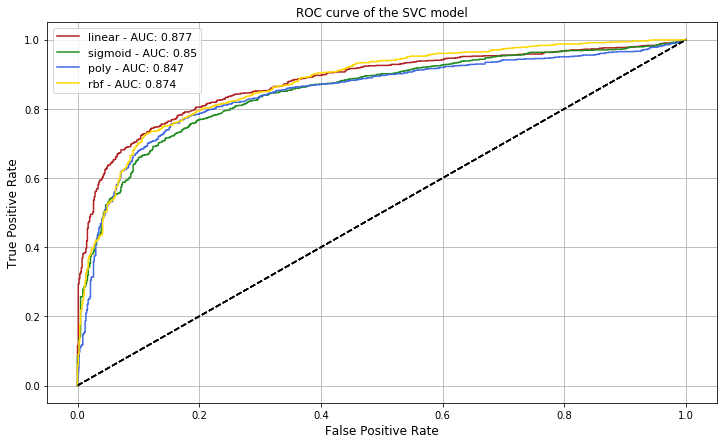

In [52]:
kernels = ['linear', 'sigmoid', 'poly', 'rbf']
gamma_list = [1, 0.0095, 0.09, 0.04]
coef_list = [0, 0.02, 0.09, 0]
colours = ['firebrick', 'forestgreen', 'royalblue', 'gold']

plt.figure(figsize=(12,7))

for i in range(0, len(kernels)):
    
    if i == 1 or i == 2:
    
        linSVM = SVC(kernel=kernels[i], gamma = gamma_list[i], coef0 = coef_list[i], random_state=0, probability=True)
        preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
        fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)

        plt.plot(fpr, tpr, color = colours[i], label=kernels[i] +' - AUC: ' + str(np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)))
        plt.plot([0, 1], [0, 1], '--', color = 'black')

        
    else:
    
        linSVM = SVC(kernel=kernels[i], gamma = gamma_list[i], random_state=0, probability=True)
        preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
        fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)

        plt.plot(fpr, tpr, color = colours[i], label=kernels[i] +' - AUC: ' + str(np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)))
        plt.plot([0, 1], [0, 1], '--', color = 'black')
        
plt.legend(fontsize=11)
plt.title('ROC curve of the SVC model')
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid()
plt.show()

So as a sum up, the best performing parameters were:
 - linear: -
 - sigmoid: gamma = 0.0095, coef0 = 0.02
 - poly: degree = 3, gamma = 0.09, coef0 = 0.09
 - rbf: gamma = 0.04

### 5.) Split the data randomly to 3 parts: 70% train, 15% validation, 15% test data and tune hyperparameters

- prepare data as described in the title, then scale all input based on the training set
- select your best performing SVC model from the previous exercise
- check the behaviour of the SVC by modifying at least 3 of its hyperparameters (C, gamma, ...) and plot the AUC value vs the modified parameter (logscale may be better for visualization)
- create plots (at least 2) that shows the train, val and test accuracy based on a given hyperparameter's different values. Is it a good idea to rely on validation data when tuning hyperparameter in this case?
- select the best settings, train the SVC and evaluate with reference to CancerSEEK results with the ROC curve and the confusion matrix (match your results with CancerSEEK's results on the same dataset splitting)

In [53]:
#splitting the dataset

X_train, X_test_val, y_train, y_test_val = train_test_split(new_dataset, values_bin, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=42)

#checking the dimensions

len(X_train), len(y_train), len(X_val), len(y_val), len(X_test), len(y_test)

(1262, 1262, 270, 270, 271, 271)

In [54]:
#scaling the dataset:

transposed_train = np.array(X_train).T
transposed_test = np.array(X_test).T
transposed_val = np.array(X_val).T

scaled_train = []
scaled_test = []
scaled_val = []

for i in range(0,len(transposed_train)):
    temp = (transposed_train[i]-np.mean(transposed_train[i]))/np.std(transposed_train[i])
    scaled_train.append(temp)
    
for i in range(0,len(transposed_test)):
    temp = (transposed_test[i]-np.mean(transposed_train[i]))/np.std(transposed_train[i])
    scaled_test.append(temp)
    
for i in range(0,len(transposed_val)):
    temp = (transposed_val[i]-np.mean(transposed_train[i]))/np.std(transposed_train[i])
    scaled_val.append(temp)
    
#transposing back the dataset

scaled_train = np.array(scaled_train).T
scaled_test = np.array(scaled_test).T
scaled_val = np.array(scaled_val).T

### Calling the different c parameter models

In [55]:
c_list = [1e-4, 1e-2, 0.1, 0.15, 0.2, 0.5, 0.7, 1.5, 10, 1e2]
auc_list = []

for c in c_list:

    linSVM = SVC(kernel='linear', random_state=0, probability=True, C = c)
    preds = cross_val_predict(estimator=linSVM, X = scaled_train, y=y_train, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=y_train)
    
    auc_list.append(roc_auc_score(y_score=preds[:,1], y_true=y_train))
    
    print(c)

0.0001
0.01
0.1
0.15
0.2
0.5
0.7
1.5
10
100.0


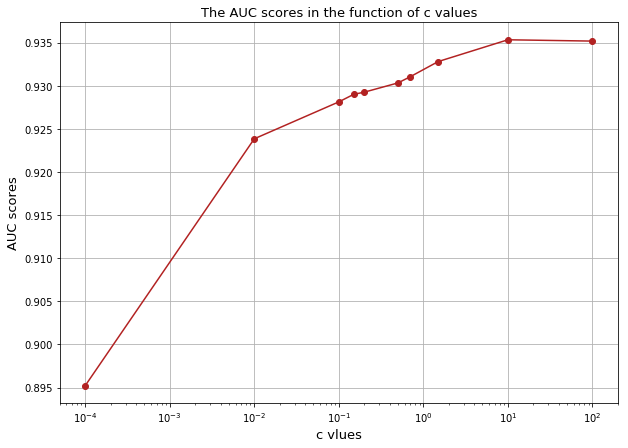

In [56]:
#plotting the recieved c - AUC function

plt.figure(figsize=(10,7))
plt.plot(c_list, auc_list, '-o', color = 'firebrick')
plt.xscale('log')
plt.title('The AUC scores in the function of c values', fontsize = 13)
plt.xlabel('c vlues', fontsize=13)
plt.ylabel('AUC scores', fontsize=13)
plt.grid()
plt.show()

By the looks of it, c = 10 gave us the best results. This value is what I'll be using in the next couple of exercises!

Let's plot the accuracy of the model in the function of different c values! For this, let's calculate the accuracies first:

#### Train, test, val -  AUC score

In [57]:
#calculating the accuracies

train_acc = []
test_acc = []
val_acc = []
c_new_list = []

for i in range(1,6):

    c = i*10
    
    linSVM = SVC(kernel='linear', random_state=0, probability=True, C = c)
    linSVM.fit(scaled_train, y_train)
    #predicted_train = linSVM.predict(scaled_test)
    
    train_acc.append(linSVM.score(scaled_train,y_train))
    test_acc.append(linSVM.score(scaled_test,y_test))
    val_acc.append(linSVM.score(scaled_val,y_val))
    
    c_new_list.append(c)

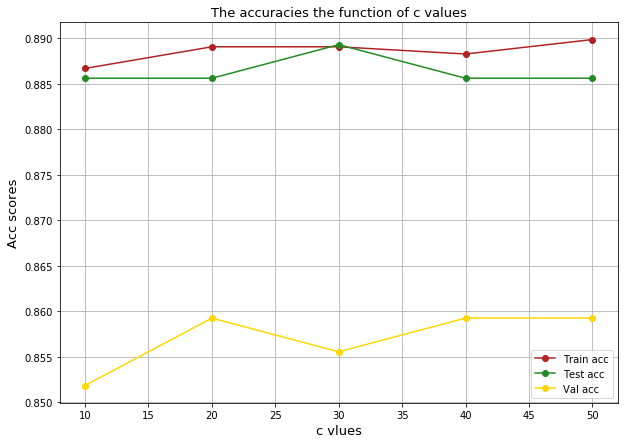

In [58]:
#plotting the accuracies in the function of c

plt.figure(figsize=(10,7))

plt.plot(c_new_list, train_acc, '-o', color = 'firebrick', label = 'Train acc')
plt.plot(c_new_list, test_acc, '-o', color = 'forestgreen', label = 'Test acc')
plt.plot(c_new_list, val_acc, '-o', color = 'gold', label = 'Val acc')

#plt.xscale('log')
plt.title('The accuracies the function of c values', fontsize = 13)
plt.xlabel('c vlues', fontsize=13)
plt.ylabel('Acc scores', fontsize=13)

plt.legend()
plt.grid()
plt.show()

As it's seen, the test accuracy has a maximum at c = 30 for the test dataset.

### Calling the different parameter models with poly, at degree = 3

#### Gamma iteration

In [59]:
auc_list_gam = []

gamma_list = np.linspace(0.01, 0.2, 10)

for gam in gamma_list:

    linSVM = SVC(kernel='poly', gamma = gam, random_state=0, probability=True, C = 1)
    preds = cross_val_predict(estimator=linSVM, X = scaled_train, y=y_train, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=y_train)
    
    auc_list_gam.append(roc_auc_score(y_score=preds[:,1], y_true=y_train))

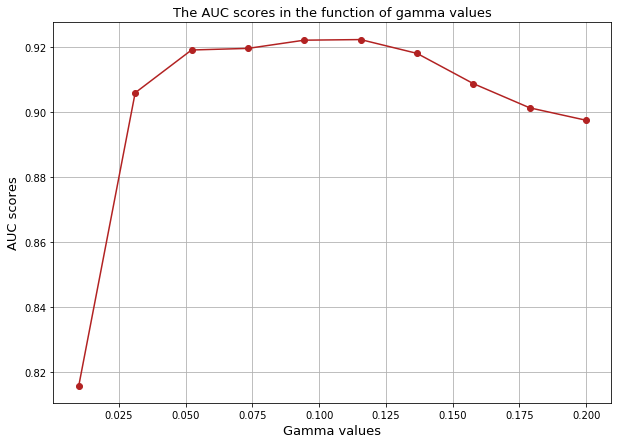

In [60]:
#plotting the recieved c - AUC function

plt.figure(figsize=(10,7))
plt.plot(gamma_list, auc_list_gam, '-o', color = 'firebrick')
#plt.xscale('log')
plt.title('The AUC scores in the function of gamma values', fontsize = 13)
plt.xlabel('Gamma values', fontsize=13)
plt.ylabel('AUC scores', fontsize=13)
plt.grid()
plt.show()

#### Coef iteration

In [61]:
auc_list_coeff = []

coeff_list = np.linspace(0.15, 0.35, 10)

for coef in coeff_list:

    linSVM = SVC(kernel='poly', gamma = 0.11, coef0 = coef, random_state=0, probability=True, C = 1)
    preds = cross_val_predict(estimator=linSVM, X = scaled_train, y=y_train, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=y_train)
    
    auc_list_coeff.append(roc_auc_score(y_score=preds[:,1], y_true=y_train))

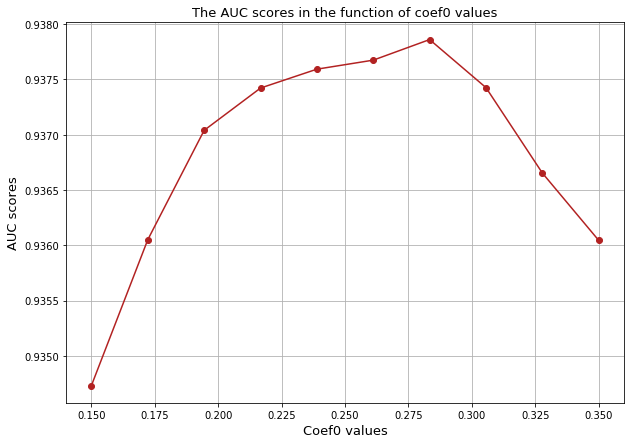

In [62]:
#plotting the recieved c - AUC function

plt.figure(figsize=(10,7))
plt.plot(coeff_list, auc_list_coeff, '-o', color = 'firebrick')
#plt.xscale('log')
plt.title('The AUC scores in the function of coef0 values', fontsize = 13)
plt.xlabel('Coef0 values', fontsize=13)
plt.ylabel('AUC scores', fontsize=13)
plt.grid()
plt.show()

#### Train, test, val -  AUC score

In [63]:
#calculating the accuracies

train_acc = []
test_acc = []
val_acc = []
c_new_list = []


gamma_list = np.linspace(0.01, 0.4, 10)

for gam in gamma_list:

    linSVM = SVC(kernel='poly', gamma = gam, coef0 = 0.09, random_state=0, probability=True, C = 1)
    linSVM.fit(scaled_train, y_train)
    #predicted_train = linSVM.predict(scaled_test)
    
    train_acc.append(linSVM.score(scaled_train,y_train))
    test_acc.append(linSVM.score(scaled_test,y_test))
    val_acc.append(linSVM.score(scaled_val,y_val))

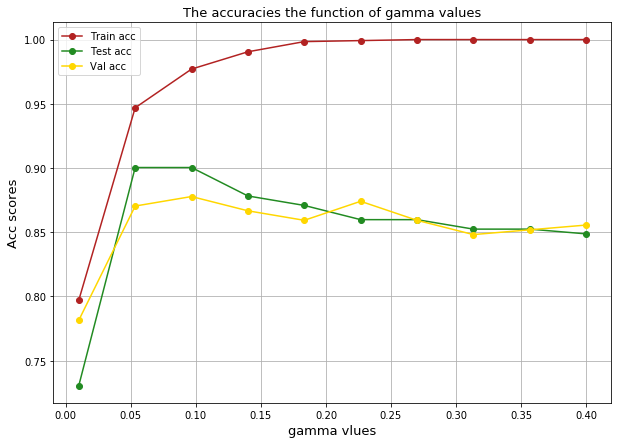

In [64]:
#plotting the accuracies in the function of c

plt.figure(figsize=(10,7))

plt.plot(gamma_list, train_acc, '-o', color = 'firebrick', label = 'Train acc')
plt.plot(gamma_list, test_acc, '-o', color = 'forestgreen', label = 'Test acc')
plt.plot(gamma_list, val_acc, '-o', color = 'gold', label = 'Val acc')

#plt.xscale('log')
plt.title('The accuracies the function of gamma values', fontsize = 13)
plt.xlabel('gamma vlues', fontsize=13)
plt.ylabel('Acc scores', fontsize=13)

plt.legend()
plt.grid()
plt.show()

### Calling the different parameter models with sigmoid

#### Gamma iteration

In [65]:
auc_list_gam_sigm = []

gamma_list = np.linspace(0.005, 0.015, 10)

for gam in gamma_list:

    linSVM = SVC(kernel='sigmoid', gamma = gam, random_state=0, probability=True, C = 1)
    preds = cross_val_predict(estimator=linSVM, X = scaled_train, y=y_train, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=y_train)
    
    auc_list_gam_sigm.append(roc_auc_score(y_score=preds[:,1], y_true=y_train))

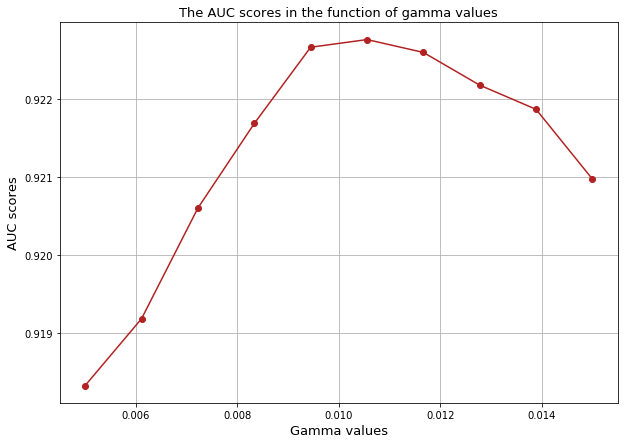

In [66]:
#plotting the recieved c - AUC function

plt.figure(figsize=(10,7))
plt.plot(gamma_list, auc_list_gam_sigm, '-o', color = 'firebrick')
#plt.xscale('log')
plt.title('The AUC scores in the function of gamma values', fontsize = 13)
plt.xlabel('Gamma values', fontsize=13)
plt.ylabel('AUC scores', fontsize=13)
plt.grid()
plt.show()

#### Coef iteration

In [67]:
auc_list_coeff_sigm = []

coeff_list = np.linspace(0.00009, 0.00015, 10)

for coef in coeff_list:

    linSVM = SVC(kernel='sigmoid', gamma = 0.0105, coef0 = coef, random_state=0, probability=True, C = 1)
    preds = cross_val_predict(estimator=linSVM, X = scaled_train, y=y_train, cv=5, method='predict_proba')
    fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=y_train)
    
    auc_list_coeff_sigm.append(roc_auc_score(y_score=preds[:,1], y_true=y_train))

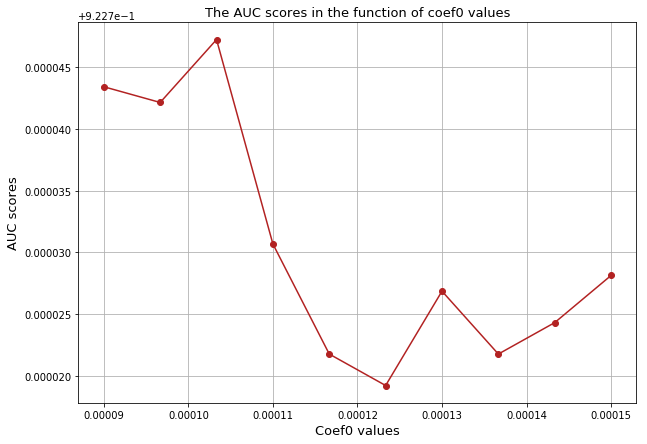

In [68]:
#plotting the recieved c - AUC function

plt.figure(figsize=(10,7))
plt.plot(coeff_list, auc_list_coeff_sigm, '-o', color = 'firebrick')
#plt.xscale('log')
plt.title('The AUC scores in the function of coef0 values', fontsize = 13)
plt.xlabel('Coef0 values', fontsize=13)
plt.ylabel('AUC scores', fontsize=13)
plt.grid()
plt.show()

#### Train, test, val -  AUC score

In [69]:
#calculating the accuracies

train_acc = []
test_acc = []
val_acc = []
c_new_list = []


gamma_list = np.linspace(0.008, 0.01, 10)

for gam in gamma_list:

    linSVM = SVC(kernel='sigmoid', gamma = gam, coef0 = 0.02, random_state=0, probability=True, C = 1)
    linSVM.fit(scaled_train, y_train)
    #predicted_train = linSVM.predict(scaled_test)
    
    train_acc.append(linSVM.score(scaled_train,y_train))
    test_acc.append(linSVM.score(scaled_test,y_test))
    val_acc.append(linSVM.score(scaled_val,y_val))

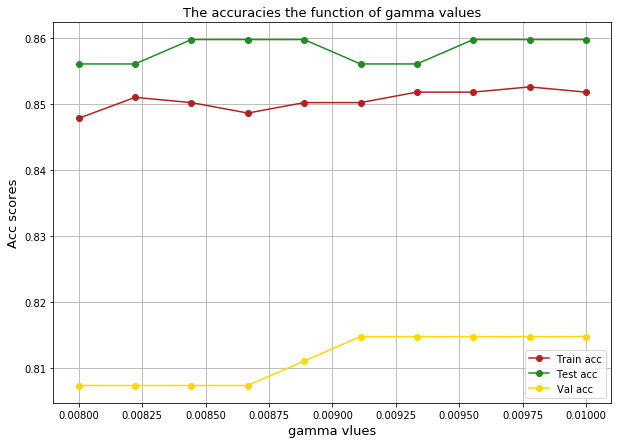

In [70]:
#plotting the accuracies in the function of c

plt.figure(figsize=(10,7))

plt.plot(gamma_list, train_acc, '-o', color = 'firebrick', label = 'Train acc')
plt.plot(gamma_list, test_acc, '-o', color = 'forestgreen', label = 'Test acc')
plt.plot(gamma_list, val_acc, '-o', color = 'gold', label = 'Val acc')

#plt.xscale('log')
plt.title('The accuracies the function of gamma values', fontsize = 13)
plt.xlabel('gamma vlues', fontsize=13)
plt.ylabel('Acc scores', fontsize=13)

plt.legend()
plt.grid()
plt.show()

### The best ROC curves:

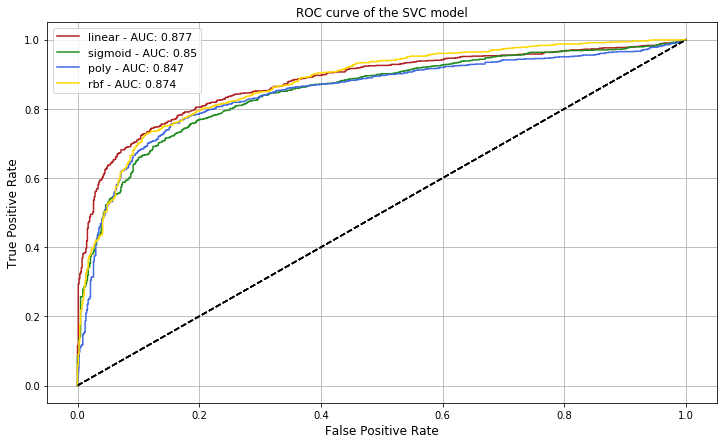

In [71]:
kernels = ['linear', 'sigmoid', 'poly', 'rbf']
gamma_list = [1, 0.0095, 0.09, 0.04]
coef_list = [0, 0.02, 0.09, 0]
colours = ['firebrick', 'forestgreen', 'royalblue', 'gold']

plt.figure(figsize=(12,7))

for i in range(0, len(kernels)):
    
    if i == 1 or i == 2:
    
        linSVM = SVC(kernel=kernels[i], gamma = gamma_list[i], coef0 = coef_list[i], random_state=0, probability=True)
        preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
        fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)

        plt.plot(fpr, tpr, color = colours[i], label=kernels[i] +' - AUC: ' + str(np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)))
        plt.plot([0, 1], [0, 1], '--', color = 'black')

        
    else:
    
        linSVM = SVC(kernel=kernels[i], gamma = gamma_list[i], random_state=0, probability=True)
        preds = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
        fpr, tpr, _ = roc_curve(y_score=preds[:, 1], y_true=values_bin)

        plt.plot(fpr, tpr, color = colours[i], label=kernels[i] +' - AUC: ' + str(np.round(roc_auc_score(y_score=preds[:, 1], y_true=values_bin), 3)))
        plt.plot([0, 1], [0, 1], '--', color = 'black')
        
plt.legend(fontsize=11)
plt.title('ROC curve of the SVC model')
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid()
plt.show()

As it's seen, the best score was given by the lienar curve. We can calcualte the confusion matrix with this model:

In [72]:
#using SVC:

model = SVC(kernel='linear', probability=True, C = 1)
model.fit(scaled_test_x, scaled_test_y)
predicted_train_scaled = model.predict(scaled_train_x)

acc = model.score(scaled_test_x, scaled_test_y)

print('The mean accuracy on the dataset:', round(acc,4))

The mean accuracy on the dataset: 0.8668


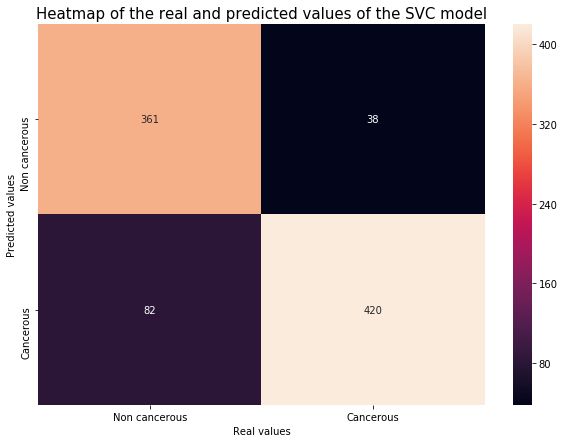

In [73]:
#creating the confusion matrix

predicted_test_model = model.predict(scaled_test_x)
confusion_matrix_values = confusion_matrix(scaled_test_y, predicted_test_model)

plt.subplots(figsize=(10,7))
x_axis_labels = ['Non cancerous','Cancerous']
y_axis_labels = ['Non cancerous','Cancerous']
p1 = sns.heatmap(confusion_matrix_values, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt="d")

plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Heatmap of the real and predicted values of the SVC model', fontsize=15)
plt.show()

In [74]:
#using logistic regression:

clf = LogisticRegression(random_state=0).fit(scaled_train_x, scaled_train_y)
predicted_train = clf.predict(scaled_train_x)

acc = clf.score(scaled_test_x, scaled_test_y)

print('The mean accuracy on the dataset:', round(acc,4))

The mean accuracy on the dataset: 0.8568


C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


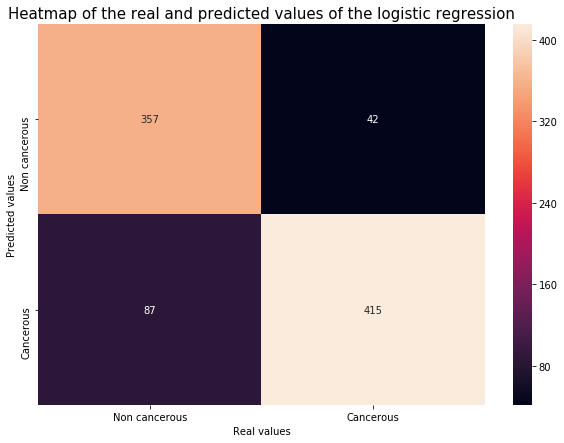

In [75]:
#creating the confusion matrix

predicted_test_clf = clf.predict(scaled_test_x)
confusion_matrix_values = confusion_matrix(scaled_test_y, predicted_test_clf)

plt.subplots(figsize=(10,7))
x_axis_labels = ['Non cancerous','Cancerous']
y_axis_labels = ['Non cancerous','Cancerous']
p1 = sns.heatmap(confusion_matrix_values, xticklabels=x_axis_labels, yticklabels=y_axis_labels, annot=True, fmt="d")

plt.xlabel('Real values')
plt.ylabel('Predicted values')
plt.title('Heatmap of the real and predicted values of the logistic regression', fontsize=15)
plt.show()

In [76]:
linSVM = SVC(kernel='linear', random_state=0, probability=True)
clf = LogisticRegression(random_state=0).fit(scaled_train_x, scaled_train_y)

preds1 = cross_val_predict(estimator=linSVM, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
fpr, tpr, _ = roc_curve(y_score=preds1[:, 1], y_true=values_bin)

preds2 = cross_val_predict(estimator=clf, X = scaled_dataset, y=values_bin, cv=5, method='predict_proba')
fpr2, tpr2, _ = roc_curve(y_score=preds2[:, 1], y_true=values_bin)

C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\haffn\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

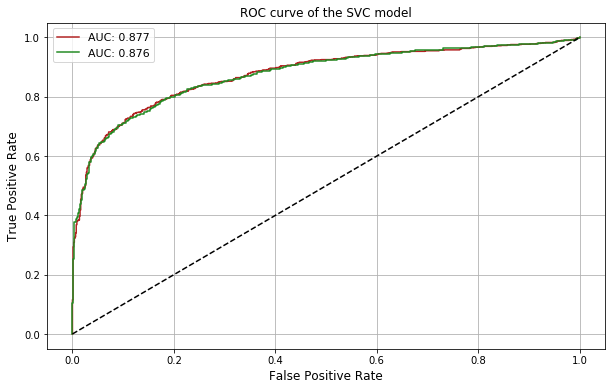

In [77]:
plt.figure(figsize=(10, 6))

plt.plot(fpr, tpr, color = 'firebrick', label='AUC: ' + str(np.round(roc_auc_score(y_score=preds1[:, 1], y_true=values_bin), 3)))
plt.plot(fpr2, tpr2, color = 'forestgreen', label='AUC: ' + str(np.round(roc_auc_score(y_score=preds2[:, 1], y_true=values_bin), 3)))

plt.plot([0, 1], [0, 1], '--', color = 'black')

plt.legend(fontsize=11)
plt.title('ROC curve of the SVC model')
plt.xlabel('False Positive Rate', fontsize = 12)
plt.ylabel('True Positive Rate', fontsize = 12)
plt.grid()
plt.show()

As it's seen, there is only a small difference between the AUC scores of the logistic regression and the SVC model. Compared to the accuracies, this is not a big suprise, since thos didn't differ very much either.